## XGBoost - Housing Prices in California

In [3]:
# !pip install numpy
# !pip install pandas
# !pip install xgboost
# !pip install csv

In [4]:
import numpy as np
import pandas as pd
import xgboost
import csv as csv

In [5]:
# Getting training and testing data
features_train = pd.read_csv('features_train.csv', index_col = 0)
features_test = pd.read_csv('features_test.csv', index_col = 0)
labels_train = pd.read_csv('labels_train.csv', index_col = 0).squeeze()
labels_test = pd.read_csv('labels_test.csv', index_col = 0).squeeze()

In [6]:
from datetime import datetime

# Record the start time
start_time = datetime.now()

In [7]:
# Features:
PERCENTAGE_OF_FEATURES_USED = 1
LEARNING_RATE = 0.001
MAX_DEPTH = 5 # 6 8
NUMBER_OF_BOOSTING_ROUNDS = 50000

In [8]:
model = xgboost.XGBRegressor(colsample_bytree = PERCENTAGE_OF_FEATURES_USED,
                             learning_rate = LEARNING_RATE,
                             max_depth = MAX_DEPTH,
                             n_estimators = NUMBER_OF_BOOSTING_ROUNDS)

In [9]:
model.fit(features_train, labels_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.001, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [10]:
# Remove less important features
# Get the feature importance scores
feature_scores = model.get_booster().get_fscore()

# Filter features with importance scores >= 10
filtered_features = {}
for feature, score in feature_scores.items():
    if score >= 10:
        filtered_features[feature] = score

# Extract the keys (feature names) as a list
most_relevant_features = list(filtered_features.keys())

In [11]:
print(most_relevant_features)

['bed', 'bath', 'acre_lot', 'house_size', 'city_Alameda', 'city_Alamo', 'city_Altadena', 'city_Anchor Bay', 'city_Angwin', 'city_Apple Valley', 'city_Aptos', 'city_Atherton', 'city_Bakersfield', 'city_Barstow', 'city_Belmont', 'city_Belvedere', 'city_Benbow', 'city_Berkeley', 'city_Beverly Hills', 'city_Big Sur', 'city_Burbank', 'city_Burlingame', 'city_Calabasas', 'city_Calistoga', 'city_Cambria', 'city_Campbell', 'city_Carlsbad', 'city_Carmel', 'city_Carpinteria', 'city_Chico', 'city_Clovis', 'city_Corona Del Mar', 'city_Coronado', 'city_Costa Mesa', 'city_Culver City', 'city_Cupertino', 'city_Daly City', 'city_Dana Point', 'city_Danville', 'city_Deer Park', 'city_Del Mar', 'city_Desert Hot Springs', 'city_Dublin', 'city_El Dorado Hills', 'city_El Segundo', 'city_Encinitas', 'city_Encino', 'city_Fay Ranch', 'city_Foster City', 'city_Fremont', 'city_Fresno', 'city_Gaviota', 'city_Gilroy', 'city_Glen Ellen', 'city_Glendale', 'city_Greenbrae', 'city_Hanford', 'city_Healdsburg', 'city_He

### re-train the model using only relevant features for a more accurate result

In [13]:
most_relevant_features_train = features_train[most_relevant_features]

In [14]:
# Calculating best metaparameters
best_xgb_model = xgboost.XGBRegressor(colsample_bytree = PERCENTAGE_OF_FEATURES_USED,
                                      learning_rate = LEARNING_RATE,
                                      max_depth = MAX_DEPTH,
                                      n_estimators = NUMBER_OF_BOOSTING_ROUNDS)

In [15]:
best_xgb_model.fit(most_relevant_features_train, labels_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.001, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [16]:
prediction = best_xgb_model.predict(features_test[most_relevant_features])

In [17]:
# Record the start time
end_time = datetime.now()

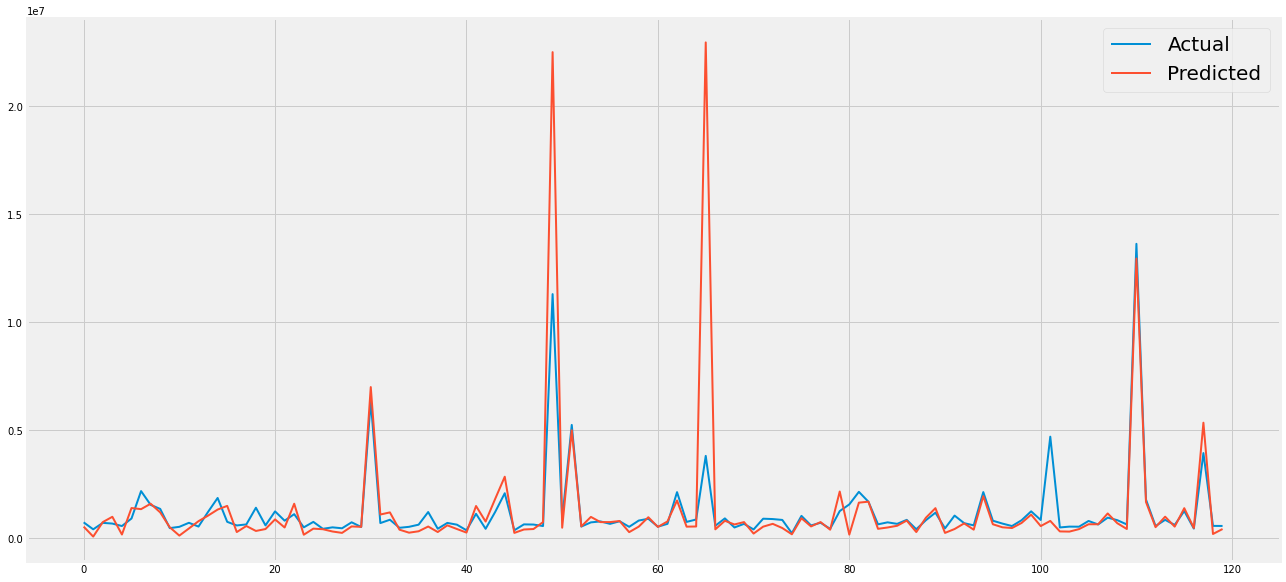

In [18]:
import matplotlib.pyplot as plt
#Graphically
grp = pd.DataFrame({'prediction': prediction,'Actual': labels_test})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.plot(grp[:120],linewidth=2)
plt.legend(['Actual','Predicted'],prop={'size': 20})

In [19]:
#R2 score
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score
from math import sqrt

target_mean = labels_test.mean()
print(f'Target mean: {target_mean:.2f}')

r2xgb = r2_score(labels_test, prediction)
print(f'The R squared of the xgboost method is: {r2xgb:.2f}')

mae = mean_absolute_error(labels_test, prediction)
print(f'The Mean Absolute Error (MAE) of the xgboost method is: {mae:.2f}')

rmse = sqrt(mean_squared_error(labels_test, prediction))
print(f'The Root Mean Squared Error (RMSE) of the xgboost method is: {rmse:.2f}')
print("Relative RMSE (as a percentage of target mean):", (rmse / target_mean) * 100, "%")

Target mean: 1213807.53
The R squared of the xgboost method is: 0.64
The Mean Absolute Error (MAE) of the xgboost method is: 434873.68
The Root Mean Squared Error (RMSE) of the xgboost method is: 1451901.16
Relative RMSE (as a percentage of target mean): 119.61543526262923 %


In [20]:
print("Run Time Duration:", (end_time - start_time))

Run Time Duration: 1:25:32.055743


In [21]:
# xgboost.plot_importance(best_xgb_model)
# plt.rcParams['figure.figsize'] = [100, 100]
# plt.show()